In [176]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request 
import seaborn as sns

In [ ]:
#https://www.uspto.gov/web/offices/ac/ido/oeip/taf/cls_cbsa/allcbsa_gd.htm

In [ ]:
#webscrape for patents by US metropolitan statistical area

In [537]:
url = 'https://www.uspto.gov/web/offices/ac/ido/oeip/taf/cls_cbsa/allcbsa_gd.htm' # This is the webpage from which the table comes from.
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
all_tables=soup.find_all("table")

right_table=soup.find_all("table", class_="table")
actual_table=soup.find_all("tbody")
table=soup.find('tbody')
headings=table.findAll('th',text="Area")
headings_list=[i.text for i in headings]
headings_list
values=table.findAll('td')
#The following empty lists are for each of the columns in the table.
regional_level=[]
id_code=[]
regional_title=[]
yr2000=[]
yr2001=[]
yr2002=[]
yr2003=[]
yr2004=[]
yr2005=[]
yr2006=[]
yr2007=[]
yr2008=[]
yr2009=[]
yr2010=[]
yr2011=[]
yr2012=[]
yr2013=[]
yr2014=[]
yr2015=[]
total=[]


for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==20:
        regional_level.append(cells[0].find(text=True))
        id_code.append(cells[1].find(text=True))
        regional_title.append(cells[2].find(text=True))
        yr2000.append(cells[3].find(text=True))
        yr2001.append(cells[4].find(text=True))
        yr2002.append(cells[5].find(text=True))
        yr2003.append(cells[6].find(text=True))
        yr2004.append(cells[7].find(text=True))
        yr2005.append(cells[8].find(text=True))
        yr2006.append(cells[9].find(text=True))
        yr2007.append(cells[10].find(text=True))
        yr2008.append(cells[11].find(text=True))
        yr2009.append(cells[12].find(text=True))
        yr2010.append(cells[13].find(text=True))
        yr2011.append(cells[14].find(text=True))
        yr2012.append(cells[15].find(text=True))
        yr2013.append(cells[16].find(text=True))
        yr2014.append(cells[17].find(text=True))
        yr2015.append(cells[18].find(text=True))
        total.append(cells[19].find(text=True))

dfip=pd.DataFrame(regional_level,columns=['regional_level'])
dfip['id_code']=id_code
dfip['regional_title']=regional_title
dfip['2000']=yr2000
dfip['2001']=yr2001
dfip['2002']=yr2002
dfip['2003']=yr2003
dfip['2004']=yr2004
dfip['2005']=yr2005
dfip['2006']=yr2006
dfip['2007']=yr2007
dfip['2008']=yr2008
dfip['2009']=yr2009
dfip['2010']=yr2010
dfip['2011']=yr2011
dfip['2012']=yr2012
dfip['2013']=yr2013
dfip['2014']=yr2014
dfip['2015']=yr2015
dfip['total']=total
for i in dfip.columns:
    dfip[i] = dfip[i].str.replace('\n',' ') #Remove \n from each string in each cell.
#dataframe for intelectual property.

In [538]:
dfip[['city_name', 'state_code']] = dfip['regional_title'].str.split(',',1,expand=True) #Split to split the name of the city with its state abbreviation.
dfip['regional_level'] = dfip['regional_level'].str.replace(' ','_')
metroip = dfip[dfip['regional_level'] == 'Metropolitan_Statistical_Area_'] #I am only interested in large cities. So keep the MSA areas.
us = dfip[dfip['regional_level'] == 'ALL_AREAS_'] #This is to keep the last row on the webpage which contains the totals for the entire sample of metropolitan and micropolitan areas.

metroip = metroip[0:374] # This is to drop the row that totals all MSA rows.

#metroip['00-15gr-%'] = ((metroip['2015']/metroip['2000'])**(1/16))-1
for i in np.linspace(2000,2015,16, dtype='int'):
    #print(i)
    metroip[str(i)] = metroip[str(i)].astype('float') #Converts each column of each year from a string into a float.
metroip2 = metroip[~metroip.isin([np.nan, np.inf, -np.inf]).any(1)] # This is to remove all rows with inf or nan values in the 00-15gr-% column. Without values we cannot do any graphical analysis on these rows.

In [ ]:
#https://www.census.gov/data/tables/time-series/dec/c2010sr-01.html

In [539]:
data = pd.read_excel(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\copy of cbsa-report-chapter-3-data.xlsx', encoding='cp1252') #This is from the 2010 census.
df = data[8:373] #Keep the rows of data.
df.columns=['MSA_id', 'MSA', 'area_type','pop_00', 'pop_10','land_area_miles2_10','pop_density_00','pop_density_10','pop_weighted_00','pop_weighted_10','change_00_10'] #Rename the columns.
df.MSA_id = df.MSA_id.astype(float)
df['MSA_id2'] = df['MSA_id'] + 100000 #So that the MSA id is the same to the USPTO data to perform a merge.
data.columns=['MSA_id', 'MSA', 'area_type','pop_00', 'pop_10','land_area_miles2_10','pop_density_00','pop_density_10','pop_weighted_00','pop_weighted_10','change_00_10']
df.pop_density_00.sort_values( ascending=False)

C:\Users\vw191\Downloads\annaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-539-51e96f393612>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MSA_id2'] = df['MSA_id'] + 100000 #So that the MSA id is the same to the USPTO data to perform a merge.


243    2740.13
206    2550.43
308    1669.16
342    1562.01
153    1458.45
        ...   
62     12.4585
17     12.1465
187    11.6468
115    11.2889
120    6.24742
Name: pop_density_00, Length: 365, dtype: object

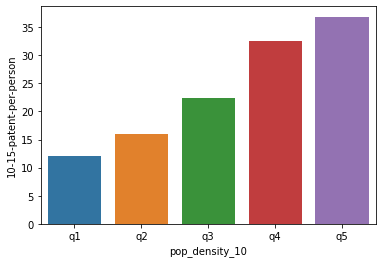

In [563]:
metroip2.id_code = metroip2.id_code.astype('float') #Convert to float to perform the merge.
mdf = pd.merge(metroip2,df,left_on='id_code',right_on='MSA_id2') #Merging USPTO data with US census data. mdf means merged df.
mdf3 = mdf #Good practice to store the merged df under another value.
mdf['gr_pop_density_00_10'] = ((mdf['pop_density_10']/mdf['pop_density_00'])**(1/11))-1 #Average annual growth in a cities population density.
mdf['gr_weighted_pop_density'] = ((mdf['pop_weighted_10']/mdf['pop_weighted_00'])**(1/11))-1 #Average annual growth in a cities weighted population density.
mdf['gr_pop_00_10'] = ((mdf['pop_10']/mdf['pop_00'])**(1/11))-1 #Average annual growth in a cities population.
mdf = mdf.sort_values(['pop_density_10'], ascending=False)
mdf = mdf[0:190] #Filters out the bottom half of the df. Because in the previous line I had sorted the df in descending order by population density (2010) therefore I have kept the 190 most dense MSA's.
mdf['pop_00'] = mdf['pop_00'].astype('float')
#The following line is to create bins to put place each row into a bin. Pd.qcat is used over pd.cat because this is create bins that place the same number of rows in each bins. 10 bins means each decile of the population density (2010) distribution.
#Pd.cat could be useful if I were to choose the bounds of each bin. This could be because if there is a large skewness in the data. 
mdf['pop_density_10'] = pd.qcut(mdf['pop_density_10'], q=5, labels=['q1', 'q2', 'q3' , 'q4', 'q5']) #q = 5. Therefore, this splits the df by the quintile of the population density for 2010. I have labelled each row q_x for each of the quintiles. I.e. q5 is the top quintile, 80% - 100%.
mdf2 = mdf.groupby(by='pop_density_10',axis=0).sum() #Group the df my the 10 bins and sum all the columns. Summing is used instead of averages as I am interested in the total patents for each year in each bin and the total population for each bin.
mdf2['freq'] = mdf.groupby(by='pop_density_10',axis=0).size() #This is to show in the new df the number of cities in each bin.
#mdf = mdf.sort_values(['pop_density_10'], ascending=True)
mdf2.drop(['id_code','MSA_id','MSA_id2'],axis=1,inplace=True) #These columns are floats and should not be added in the groupby.
ust =  us['2010'].astype('float') + us['2011'].astype('float') + us['2012'].astype('float') + us['2013'].astype('float') + us['2014'].astype('float') + us['2015'].astype('float') #This is to calculate the total patents between 2010 and 2015 for the entire dataset.
mdf2['00-15-total'] = (mdf2['2000'] + mdf2['2001'] + mdf2['2002'] + mdf2['2003'] + mdf2['2004'] + mdf2['2005'] + mdf2['2006'] + mdf2['2007'] + mdf2['2008'] + mdf2['2009'] + mdf2['2010'] + mdf2['2011'] + mdf2['2012'] + mdf2['2013'] + mdf2['2014'] + mdf2['2015']) #1592166)*100
mdf2['10-15-total'] = (mdf2['2010'] + mdf2['2011'] + mdf2['2012'] + mdf2['2013'] + mdf2['2014'] + mdf2['2015'])
mdf2['10-15-patent-per-person'] = (mdf2['10-15-total'] / mdf2['pop_10'])*10000 #This is to calculate patent per 10,000 people.
mdf2['10-15-%-total'] = (mdf2['10-15-total'] / ust)*100 #This is to calculate the total patents for each bin between 2010 and 2015 and divide this by the total number of patents in the dataset for the same period. This gives us the share of total patents for each bin.
mdf2['00-15gr-%'] = ((mdf2['2015']/mdf2['2000'])**(1/16))-1 #The average annual growth rate of patents between 2000 and 2015.
mdf2['10-15gr-%'] = ((mdf2['2015']/mdf2['2010'])**(1/6))-1 #The average annual growth rate of patents between 2010 and 2015.
mdf2.reset_index(inplace=True) #This is to make the barplot using the index as the x axis in seaborn.
sns.barplot(data=mdf2,x='pop_density_10',y='10-15-patent-per-person') #Plots the chart

mdf2.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\uspto_density.csv')


Index(['regional_level', 'id_code', 'regional_title', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', 'total', 'city_name', 'state_code',
       'MSA_id', 'MSA', 'area_type', 'pop_00', 'pop_10', 'land_area_miles2_10',
       'pop_density_00', 'pop_density_10', 'pop_weighted_00',
       'pop_weighted_10', 'change_00_10', 'MSA_id2', 'gr_pop_density_00_10',
       'gr_weighted_pop_density', 'gr_pop_00_10', '10-15-total',
       'patentperpop10', '15_share', 'pop_10_share'],
      dtype='object')


,regional_level,id_code,regional_title,2000,2001,2002,2003,2004,2005,2006,...,pop_weighted_10,change_00_10,MSA_id2,gr_pop_density_00_10,gr_weighted_pop_density,gr_pop_00_10,10-15-total,patentperpop10,15_share,pop_10_share
1,Metropolitan_Statistical_Area_,135620.0,"New York-Northern New Jersey-Long Island, NY-N...",5689.0,5638.0,5479.0,5233.0,4717.0,3959.0,4951.0,...,31251.435610,-432.171,135620.0,0.00280864,-0.00124777,0.00280864,43625.0,0.002309,5.502100,6.120610
3,Metropolitan_Statistical_Area_,131100.0,"Los Angeles-Long Beach-Santa Ana, CA",3877.0,3995.0,3889.0,4057.0,3959.0,3674.0,4445.0,...,12113.876664,-328.122,131100.0,0.00334877,-0.00242669,0.00334877,35335.0,0.002754,4.595254,4.155149
5,Metropolitan_Statistical_Area_,116980.0,"Chicago-Joliet-Naperville, IL-IN-WI",3101.0,2981.0,2772.0,2616.0,2562.0,2246.0,2689.0,...,8613.394800,-1216.24,116980.0,0.00356086,-0.0119358,0.00356086,21206.0,0.002241,2.773757,3.064370
10,Metropolitan_Statistical_Area_,119100.0,"Dallas-Fort Worth-Arlington, TX",2116.0,2130.0,1926.0,1884.0,1959.0,1685.0,2016.0,...,3909.282422,-385.936,119100.0,0.0193338,-0.00852244,0.0193338,16073.0,0.002523,2.147196,2.063762
12,Metropolitan_Statistical_Area_,137980.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2185.0,2225.0,2091.0,1934.0,1706.0,1478.0,1806.0,...,7773.154881,-291.135,137980.0,0.00435106,-0.00333711,0.00435106,14106.0,0.002365,1.672485,1.932123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Metropolitan_Statistical_Area_,141780.0,"Sandusky, OH",7.0,8.0,8.0,3.0,11.0,8.0,5.0,...,1782.698676,-237.111,141780.0,-0.00286565,-0.0112881,-0.00286565,72.0,0.000934,0.006386,0.024965
157,Metropolitan_Statistical_Area_,118020.0,"Columbus, IN",60.0,51.0,47.0,52.0,42.0,39.0,37.0,...,1083.779445,-2.79831,118020.0,0.0065979,-0.000234396,0.0065979,387.0,0.005039,0.064572,0.024873
355,Metropolitan_Statistical_Area_,116220.0,"Casper, WY",2.0,2.0,4.0,4.0,3.0,4.0,2.0,...,2003.557671,-31.0688,116220.0,0.0114994,-0.00139791,0.0114994,21.0,0.000278,0.003548,0.024438
361,Metropolitan_Statistical_Area_,130300.0,"Lewiston, ID-WA",3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,1443.621690,12.2994,130300.0,0.00448875,0.000778147,0.00448875,15.0,0.000246,0.002129,0.019721


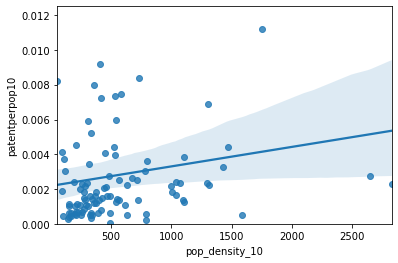

In [534]:
#This kernel was to investigate if there is a simple linear regression relationship between patents as a share of total patents and population density.
mdf3 = mdf3.sort_values(['pop_00'], ascending=False)
dat = mdf3[0:300]
mdf3['10-15-total'] = mdf3['2010'] + mdf3['2011'] + mdf3['2012'] + mdf3['2013'] + mdf3['2014'] + mdf3['2015']
mdf3['patentperpop10'] = mdf3['10-15-total'] / mdf3['pop_10']
mdf3['15_share'] = (mdf3['2015']/140928)*100
mdf3['pop_10_share'] = (mdf3['pop_10']/308745538.0)*100
mdf3 = mdf3.sort_values(['pop_10_share'], ascending=False)
ax2 = sns.regplot(x='pop_density_10',y='patentperpop10',data=mdf3[0:100])
plt.ylim(0,0.0125)
print(mdf3.columns)
mdf3